In [ ]:
!nvidia-smi

Sun Jan 19 21:50:25 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   43C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!kill -9 <PID>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kill -9 <PID>'


In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [ ]:
!pip install numpy
!pip install torch
!pip install -U bitsandbytes
!pip install transformers peft unsloth datasets accelerate
!pip install bert-score rouge-score
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.8 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=882be536b5f75d957c2526f7d546ba75d8726bb061b094f570bd40b89d64a729
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.9 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training

# Define the quantization configuration
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type="nf4",  # Use NormalFloat4 quantization type
    bnb_4bit_compute_dtype=torch.float16,  # Use float16 for computation
    bnb_4bit_use_double_quant=True,  # Enable double quantization
)

# Load the model with quantization
model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Llama-3.2-1B-Instruct",
    device_map="auto",
    quantization_config=bnb_config,  # Pass the quantization configuration
    trust_remote_code=True,
)

# Prepare the model for k-bit training
model = prepare_model_for_kbit_training(model)
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
# Apply QLoRA adapters
from peft import LoraConfig, get_peft_model

def apply_qlora_adapters(base_model):
    lora_config = LoraConfig(
        r=8,
        lora_alpha=8,
        target_modules=["self_attn.qkv_proj", "mlp.gate_up_proj", "mlp.down_proj"],
        lora_dropout=0.05,
        bias="none",
        task_type="CAUSAL_LM",
    )

    lora_model = get_peft_model(base_model, lora_config)
    return lora_model

# Apply QLoRA to the quantized model
lora_model = apply_qlora_adapters(model)

In [ ]:
lora_model.print_trainable_parameters()

trainable params: 1,310,720 || all params: 1,237,125,120 || trainable%: 0.1059


In [ ]:
# Load data
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd

# Load tokenizer and dataset
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B-Instruct", padding_side="right")
dataset = load_dataset("soumakchak/earnings_call_dataset")

train_set = dataset["train"]
valid_set = dataset["validation"]
test_set = dataset["test"]

train_df = train_set.to_pandas()
valid_df = valid_set.to_pandas()
test_df = test_set.to_pandas()

print("First few samples from the training set:")
print(train_df.head())
print("First few samples from the validation set:")
print(valid_df.head())
print("First few samples from the test set:")
print(test_df.head())

train.csv:   0%|          | 0.00/30.5M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/4.39M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/8.84M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1681 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/249 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/495 [00:00<?, ? examples/s]

First few samples from the training set:
                                            document  \
0  For those of you that have not, it is availabl...   
1  I'm joined by Tom Greco, our President and Chi...   
2  I am joined by Tom Greco, our President and Ch...   
3  I'm joined today by Tom Greco, our President a...   
4  Both are now available on the Investors sectio...   

                                             summary  
0  q1 revenue rose 11.1 percent to $481.1 million...  
1  q1 adjusted earnings per share $3.34.\nq1 sale...  
2  advance auto parts q2 adjusted earnings per sh...  
3  compname reports q3 adjusted earnings per shar...  
4  withdrew its full year 2020 guidance that was ...  
First few samples from the validation set:
                                            document  \
0  Total revenue was approximately $1.5 billion, ...   
1  Regarding today's program, we will first revie...   
2  Factors, to our Annual Report on Form 10-K for...   
3  References to margins 

In [ ]:
# Compute token lengths
def compute_length(example):
    example["token_length"] = len(tokenizer(example["document"], truncation=False)["input_ids"])
    return example

# Add token length column to each split
train_with_lengths = dataset["train"].map(compute_length)
validation_with_lengths = dataset["validation"].map(compute_length)
test_with_lengths = dataset["test"].map(compute_length)

# Extract lengths for analysis
train_documents = train_with_lengths["document"]
validation_documents = validation_with_lengths["document"]
test_documents = test_with_lengths["document"]

train_lengths = train_with_lengths["token_length"]
validation_lengths = validation_with_lengths["token_length"]
test_lengths = test_with_lengths["token_length"]

# Create DataFrames for better readability
train_analysis = pd.DataFrame({
    "Document": train_documents,
    "Token Length": train_lengths
})
validation_analysis = pd.DataFrame({
    "Document": validation_documents,
    "Token Length": validation_lengths
})
test_analysis = pd.DataFrame({
    "Document": test_documents,
    "Token Length": test_lengths
})

# Displaying a summary of the token lengths for each set
train_analysis_summary = train_analysis.describe()
validation_analysis_summary = validation_analysis.describe()
test_analysis_summary = test_analysis.describe()

print(f"Train Analysis Summary:", train_analysis_summary)
print(f"Validation Analysis Summary:", validation_analysis_summary)
print(f"Test Analysis Summary:", test_analysis_summary)

Map:   0%|          | 0/1681 [00:00<?, ? examples/s]

Map:   0%|          | 0/249 [00:00<?, ? examples/s]

Map:   0%|          | 0/495 [00:00<?, ? examples/s]

Train Analysis Summary:        Token Length
count   1681.000000
mean    3538.713861
std     1303.679391
min      288.000000
25%     2653.000000
50%     3421.000000
75%     4340.000000
max    13800.000000
Validation Analysis Summary:        Token Length
count    249.000000
mean    3431.819277
std     1274.649374
min      973.000000
25%     2573.000000
50%     3360.000000
75%     4158.000000
max    10756.000000
Test Analysis Summary:        Token Length
count    495.000000
mean    3496.313131
std     1341.159620
min      567.000000
25%     2600.000000
50%     3379.000000
75%     4262.000000
max    10743.000000


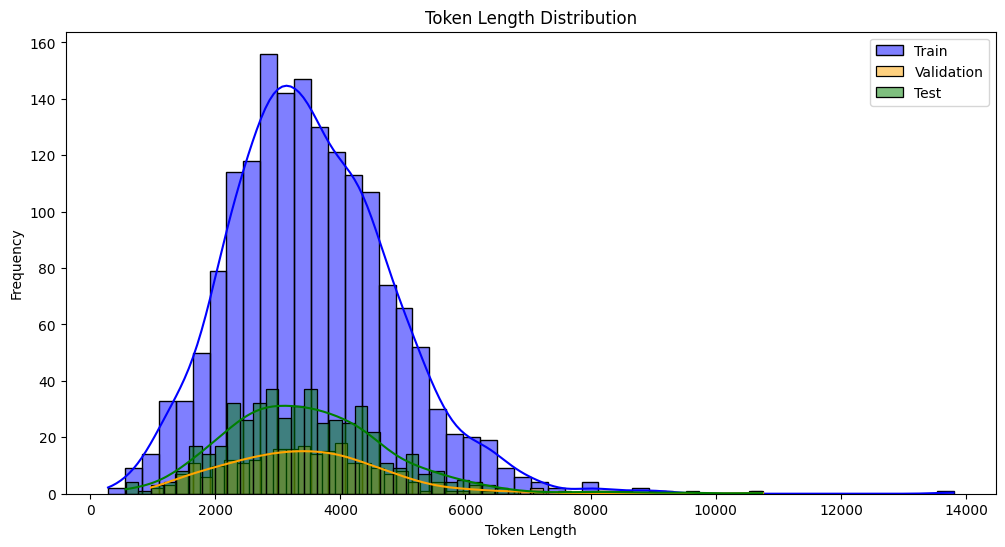

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract lengths for visualization
train_lengths = train_with_lengths["token_length"]
validation_lengths = validation_with_lengths["token_length"]
test_lengths = test_with_lengths["token_length"]

# Plotting the length distributions
plt.figure(figsize=(12, 6))
sns.histplot(train_lengths, bins=50, color='blue', label='Train', kde=True)
sns.histplot(validation_lengths, bins=50, color='orange', label='Validation', kde=True)
sns.histplot(test_lengths, bins=50, color='green', label='Test', kde=True)
plt.title("Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
from transformers import AutoTokenizer
from datasets import load_dataset

# Load dataset
dataset = load_dataset("soumakchak/earnings_call_dataset")

# Define the maximum token length
max_length = 2048

# Filter documents
def filter_documents(example):
    tokenized_length = len(tokenizer(example["document"], truncation=False)["input_ids"])
    return tokenized_length <= max_length

filtered_train = dataset["train"].filter(filter_documents)
filtered_validation = dataset["validation"].filter(filter_documents)
filtered_test = dataset["test"].filter(filter_documents)

Filter:   0%|          | 0/1681 [00:00<?, ? examples/s]

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

Filter:   0%|          | 0/495 [00:00<?, ? examples/s]

In [ ]:
print(f"Filtered training set size: {len(filtered_train)}")
print(f"Filtered validation set size: {len(filtered_validation)}")
print(f"Filtered test set size: {len(filtered_test)}")

# Verify the longest document
max_train_length = max(
    len(tokenizer(doc, truncation=False)["input_ids"]) for doc in filtered_train["document"]
)
print(f"Longest document in the training set: {max_train_length} tokens")

# Verify the longest document in the test set
max_test_length = max(
    len(tokenizer(doc, truncation=False)["input_ids"]) for doc in filtered_test["document"]
)
print(f"Longest document in the test set: {max_test_length} tokens")

Filtered training set size: 183
Filtered validation set size: 32
Filtered test set size: 55
Longest document in the training set: 2046 tokens
Longest document in the test set: 2018 tokens


In [ ]:
print(filtered_train[10])
print(filtered_validation[10])
print(filtered_test[10])

{'document': "Core in this case means designated financial metrics excluding the impact of the recent S::can and ATI acquisitions.\nWe believe this reference point is important for year-over-year comparability.\nIn summary, I'm pleased with our results for the quarter, delivering sales and earnings per share growth, margin expansion, and robust cash flow.\nMost exciting we experienced record order rates for our smart water solutions across both lines of business as the underlying growth drivers for our digital solutions are embraced by customers.\nThe well-publicized and widespread electronic supply shortages limited our conversion of these record orders into sales in the quarter.\nTempering core sales growth but resulting in a record-high order backlog heading into the second quarter, which bodes well for the balance of the year.\nOur recent acquisitions delivered strong top-line results with net profitability muted as expected as a result of purchase accounting items.\nOverall, our a

In [ ]:
# Prepare prompts
def prepare_messages(example):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant that summarizes earnings call documents. Your task is to perform abstractive summarization on the given text. You should provide telegraph-style bulletin point summaries. Always include performance-related numbers and key metrics in your summarization. Summarize the text in a few short and concise sentences, focusing on the most important information. Always start your summary with 'Sure! Here is the summary:\n'.",
        },
        {
            "role": "user",
            "content": f"Summarise the following text: {example['document']}",  # Insert the document into the user's message
        },
        {
            "role": "assistant",
            "content": f"Sure! Here is the summary:\n {example['summary']}",  # Include the summary as the assistant's response
        },
    ]
    return {"messages": messages}

In [ ]:
print(prepare_messages(filtered_train[0]))

{'messages': [{'role': 'system', 'content': "You are a helpful assistant that summarizes earnings call documents. Your task is to perform abstractive summarization on the given text. You should provide telegraph-style bulletin point summaries. Always include performance-related numbers and key metrics in your summarization. Summarize the text in a few short and concise sentences, focusing on the most important information. Always start your summary with 'Sure! Here is the summary:\n'."}, {'role': 'user', 'content': "Summarise the following text: As you may recall, on our Q2 call in July, we were still somewhat apprehensive as we had just surpassed last year's COVID-impacted leasing velocity and the emerging Delta variant was creating uncertainty around universities plans to move forward with in-person classes and a return of campus social activities.\nAt that time, based on historical leasing velocity data, we continued to believe that the industry's COVID recovery would not fully mate

In [ ]:
# Process Datasets
from datasets import Dataset
from tqdm.auto import tqdm

def process_dataset(dataset):
    processed_examples = []
    for i in range(len(dataset)):
        processed_example = prepare_messages(dataset[i])
        processed_examples.append(processed_example)
    return processed_examples

processed_train = process_dataset(filtered_train)
processed_validation = process_dataset(filtered_validation)
processed_test = process_dataset(filtered_test)

In [ ]:
print(processed_train[0])

{'messages': [{'role': 'system', 'content': "You are a helpful assistant that summarizes earnings call documents. Your task is to perform abstractive summarization on the given text. You should provide telegraph-style bulletin point summaries. Always include performance-related numbers and key metrics in your summarization. Summarize the text in a few short and concise sentences, focusing on the most important information. Always start your summary with 'Sure! Here is the summary:\n'."}, {'role': 'user', 'content': "Summarise the following text: As you may recall, on our Q2 call in July, we were still somewhat apprehensive as we had just surpassed last year's COVID-impacted leasing velocity and the emerging Delta variant was creating uncertainty around universities plans to move forward with in-person classes and a return of campus social activities.\nAt that time, based on historical leasing velocity data, we continued to believe that the industry's COVID recovery would not fully mate

In [ ]:
lora_model.gradient_checkpointing_enable()

In [ ]:
# Filter the dataset to get valid samples
def is_valid_example(example, tokenizer, max_length=2048):
    messages = example['messages']
    assistant_message = None
    for message in messages:
        if message['role'].lower() == 'assistant':
            assistant_message = message['content']
            break
    if assistant_message is None or assistant_message.strip() == '':
        return False

    # Serialize the conversation up to the assistant's message
    pre_assistant_conversation = ''
    for message in messages:
        if message['role'].lower() == 'assistant':
            break
        role = message['role']
        content = message['content']
        pre_assistant_conversation += f"{role}:\n{content}\n"

    # Tokenize the pre-assistant conversation
    pre_assistant_tokens = tokenizer(
        pre_assistant_conversation,
        truncation=True,
        max_length=max_length,
        padding=False,
        return_tensors='pt',
    )['input_ids'][0]

    assistant_tokens = tokenizer(
        assistant_message,
        truncation=True,
        max_length=max_length,
        padding=False,
        return_tensors='pt',
    )['input_ids'][0]


    # Create labels: -100 for pre-assistant tokens, actual tokens for assistant response
    labels = [-100] * len(pre_assistant_tokens) + assistant_tokens.tolist()
    labels = labels[:max_length]

    # Check if there are any valid labels
    if all(label == -100 for label in labels):
        return False

    return True

In [ ]:
from datasets import Dataset

# Filter training, validation and test sets
valid_train_examples = [
    example for example in processed_train
    if is_valid_example(example, tokenizer)
]

valid_test_examples = [
    example for example in processed_test
    if is_valid_example(example, tokenizer)
]

valid_validation_examples = [
    example for example in processed_validation
    if is_valid_example(example, tokenizer)
]

print(f"Original training set size: {len(processed_train)}")
print(f"Filtered training set size: {len(valid_train_examples)}")

print(f"Original test set size: {len(processed_test)}")
print(f"Filtered test set size: {len(valid_test_examples)}")

print(f"Original validation set size: {len(processed_validation)}")
print(f"Filtered validation set size: {len(valid_validation_examples)}")

# Create new Datasets with the filtered examples
filtered_train_dataset = valid_train_examples
filtered_test_dataset = valid_test_examples
filtered_eval_dataset = valid_validation_examples

Original training set size: 183
Filtered training set size: 149
Original test set size: 55
Filtered test set size: 49
Original validation set size: 32
Filtered validation set size: 29


In [ ]:
# Prepare input data for fine-tuning
def data_collator(features):
    input_ids_list = []
    labels_list = []

    for feature in features:
        messages = feature['messages']

        # Serialize messages into a single string
        conversation = ''
        for message in messages:
            role = message['role']
            content = message['content']
            conversation += f"{role}:\n{content}\n"

        # Tokenize the entire conversation at once
        inputs = tokenizer(
            conversation,
            truncation=True,
            max_length=2048,
            padding=False,
            return_tensors='pt',
        )

        input_ids = inputs['input_ids'][0]

        # Find the assistant's message position
        assistant_index = None
        for idx, message in enumerate(messages):
            if message['role'].lower() == 'assistant':
                assistant_index = idx
                break

        if assistant_index is None:
            raise ValueError("Assistant's message not found in the conversation.")

        # Tokenize the conversation up to the assistant's message
        pre_assistant_conversation = ''
        for message in messages[:assistant_index]:
            role = message['role']
            content = message['content']
            pre_assistant_conversation += f"{role}:\n{content}\n"

        pre_assistant_tokens = tokenizer(
            pre_assistant_conversation,
            truncation=True,
            max_length=2048,
            padding=False,
            return_tensors='pt',
        )['input_ids'][0]

        assistant_token_start = len(pre_assistant_tokens)

        # Create labels: Mask input tokens, keep assistant's response tokens
        labels = [-100] * assistant_token_start + input_ids[assistant_token_start:].tolist()
        labels = labels[:2048]  # Ensure labels are within max length

        # Append to lists
        input_ids_list.append(input_ids)
        labels_list.append(torch.tensor(labels))

    # Pad sequences
    input_ids_padded = torch.nn.utils.rnn.pad_sequence(
        input_ids_list, batch_first=True, padding_value=tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0
    )
    labels_padded = torch.nn.utils.rnn.pad_sequence(
        labels_list, batch_first=True, padding_value=-100
    )

    # attention_mask_padded = input_ids_padded != tokenizer.pad_token_id
    attention_mask_padded = torch.ones_like(input_ids_padded, dtype=torch.int64)
    attention_mask_padded[input_ids_padded == tokenizer.pad_token_id] = 0

    batch = {
        'input_ids': input_ids_padded,
        'attention_mask': attention_mask_padded,
        'labels': labels_padded,
    }

    return batch

In [ ]:
# Define the training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./fine-tuned-model',
    num_train_epochs=10,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    evaluation_strategy='steps',   # Evaluate every `eval_steps`
    eval_steps=10,
    save_strategy='steps',
    save_steps=10,                 # Save checkpoints every 10 steps
    logging_strategy='steps',      # Log every `logging_steps`
    logging_steps=1,               # Log every step
    learning_rate=2e-4,
    weight_decay=0.01,
    fp16=True,
    dataloader_num_workers=4,
    gradient_accumulation_steps=8,
    save_total_limit=2,
    remove_unused_columns=False,
    logging_first_step=True,       # Log the first step
    report_to="none",
    load_best_model_at_end=True,  # Load the best model
    metric_for_best_model="eval_loss",
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,  # Stops after 3 evaluations with no improvement
    early_stopping_threshold=0.01,  # Minimum change to qualify as an improvement
)

trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=filtered_train_dataset,
    eval_dataset=filtered_eval_dataset,
    data_collator=data_collator,
    callbacks=[early_stopping],
)

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
# Test with a training sample
train_sample = filtered_train_dataset[0]
train_batch = data_collator([train_sample])
print("Training batch input_ids shape:", train_batch["input_ids"].shape)
print("Training batch labels shape:", train_batch["labels"].shape)

# Test with a validation sample
val_sample = filtered_eval_dataset[0]
val_batch = data_collator([val_sample])
print("Validation batch input_ids shape:", val_batch["input_ids"].shape)
print("Validation batch labels shape:", val_batch["labels"].shape)

Training batch input_ids shape: torch.Size([1, 1612])
Training batch labels shape: torch.Size([1, 1612])
Validation batch input_ids shape: torch.Size([1, 1737])
Validation batch labels shape: torch.Size([1, 1737])


In [ ]:
# Get a batch from the data loader
from transformers import TrainingArguments, Trainer

train_dataloader = trainer.get_train_dataloader()
batch = next(iter(train_dataloader))

# Move batch to device
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#batch = {k: v.to(device) for k, v in batch.items()}

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch = {k: v.to(device) if torch.is_tensor(v) else v for k, v in batch.items()}

# Set model to training mode
lora_model.train()

# Forward pass
outputs = lora_model(**batch)
loss = outputs.loss
print(f"Manual loss computation: {loss.item():.2f}")

# Backward pass
loss.backward()

Manual loss computation: 0.45


In [ ]:
lora_model.config.use_cache = False

In [ ]:
lora_model.gradient_checkpointing_enable()

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
10,1.113000,0.947201
20,1.234300,0.933808
30,1.234400,0.938660
40,0.851500,0.923265
50,0.698700,0.939816
60,0.566000,0.940862
70,0.743200,0.950691


TrainOutput(global_step=70, training_loss=0.8033639524664198, metrics={'train_runtime': 423.4568, 'train_samples_per_second': 3.519, 'train_steps_per_second': 0.425, 'total_flos': 5177797814882304.0, 'train_loss': 0.8033639524664198, 'epoch': 3.697986577181208})

In [ ]:
# After training
from peft import PeftModel

# Merge LoRA adapters into the base model
merged_model = lora_model.merge_and_unload()
merged_model.save_pretrained('./fine-tuned-merged-model')

tokenizer.save_pretrained("./fine-tuned-model")

/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/bnb.py:355: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


('./fine-tuned-model/tokenizer_config.json',
 './fine-tuned-model/special_tokens_map.json',
 './fine-tuned-model/tokenizer.json')

In [ ]:
eval_results = trainer.evaluate()
perplexity = torch.exp(torch.tensor(eval_results['eval_loss']))
print(f"Perplexity: {perplexity:.2f}")

Perplexity: 11.77


In [ ]:
metrics = trainer.evaluate(eval_dataset=filtered_eval_dataset)
print(metrics)

{'eval_loss': 2.4658026695251465, 'eval_runtime': 6.6059, 'eval_samples_per_second': 4.39, 'eval_steps_per_second': 4.39, 'epoch': 3.697986577181208}


In [ ]:
# Compute ROUGE and BERTSCORE
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from tqdm.auto import tqdm

# Load the merged model and tokenizer
merged_model = AutoModelForCausalLM.from_pretrained("./fine-tuned-merged-model")
tokenizer = AutoTokenizer.from_pretrained("./fine-tuned-model")

# Create a text generation pipeline
generator = pipeline("text-generation", model=merged_model, tokenizer=tokenizer)


# Define a function to extract input text and reference summary
def extract_input_and_reference(example):
    # Extract user message (input text)
    user_message = example["messages"][1]["content"]
    input_text = user_message.replace("Summarise the following text: ", "").strip()

    # Extract assistant message (reference summary)
    assistant_message = example["messages"][2]["content"]
    reference_summary = assistant_message.replace("Sure! Here is the summary:\n", "").strip()

    print("\nReference Summary:")
    print(reference_summary)

    return input_text, reference_summary

# Define a function to compute ROUGE and BERTScore
def compute_metrics(dataset):
    rouge = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

    rouge_scores = []
    bert_scores = []

    for example in tqdm(dataset, total=len(dataset)):
        # Extract input text and reference summary
        input_text, reference_summary = extract_input_and_reference(example)

        # Prepare the prompt for inference
        messages = [
            {
                "role": "system",
                "content": "You are a helpful assistant that summarizes earnings call documents. Your task is to perform abstractive summarization on the given text. Pay special attention to performance-related numbers and key metrics. Summarize the text in a few short and concise sentences, focusing on the most important information. Always start your summary with 'Sure! Here is the summary:\n'.",
            },
            {
                "role": "user",
                "content": f"Summarise the following text: {input_text}",
            },
            {
                "role": "assistant",
                "content": "Sure! Here is the summary:\n",
            },
        ]

        # Convert messages to a single string for the model
        prompt = "\n".join([f"{msg['role']}:\n{msg['content']}" for msg in messages])

        # Generate summary
        generated_summary = generator(
            prompt,
            max_new_tokens=512,
            num_beams=1,
            do_sample=False, # Disable sampling, deterministic output
            temperature=0.2,
            top_p=0.95,
        )[0]["generated_text"]

        # Extract the assistant's response from the generated text
        generated_summary = generated_summary.split("Sure! Here is the summary:\n")[-1].strip()

        # Print generated summary
        print("\nGenerated Summary:")
        print(generated_summary)

        # Compute ROUGE scores
        rouge_result = rouge.score(reference_summary, generated_summary)
        rouge_scores.append(rouge_result)

        # Compute BERTScore
        P, R, F1 = bert_score([generated_summary], [reference_summary], lang="en")
        bert_scores.append(F1.mean().item())

    # Aggregate results
    avg_rouge1 = sum([s["rouge1"].fmeasure for s in rouge_scores]) / len(rouge_scores)
    avg_rouge2 = sum([s["rouge2"].fmeasure for s in rouge_scores]) / len(rouge_scores)
    avg_rougeL = sum([s["rougeL"].fmeasure for s in rouge_scores]) / len(rouge_scores)
    avg_bertscore = sum(bert_scores) / len(bert_scores)

    return {
        "avg_rouge1": avg_rouge1,
        "avg_rouge2": avg_rouge2,
        "avg_rougeL": avg_rougeL,
        "avg_bertscore": avg_bertscore,
    }

# Compute metrics on the validation set
print("Evaluating on the validation set...")
valid_metrics = compute_metrics(filtered_eval_dataset)
print(f"Validation Set - Average ROUGE-1: {valid_metrics['avg_rouge1']:.2f}")
print(f"Validation Set - Average ROUGE-2: {valid_metrics['avg_rouge2']:.2f}")
print(f"Validation Set - Average ROUGE-L: {valid_metrics['avg_rougeL']:.2f}")
print(f"Validation Set - Average BERTScore: {valid_metrics['avg_bertscore']:.2f}")

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.
Device set to use cuda:0


Evaluating on the validation set...


  0%|          | 0/29 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.2` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
abbott sold more than 225 mln covid-19 tests globally in q3.
compname says company sold more than 225 million covid tests globally in third quarter.
compname says co has supply capacity of more than 100 million tests per month.
abbott forecasts $1 billion to $1.4 billion of covid testing-related sales in q4.

Generated Summary:
Abbott's third quarter results showed strong growth across all major businesses, with sales increasing 22.4% on an organic basis. Excluding COVID testing-related sales, organic sales growth was 12.1% versus last year and 11.7% compared to the third quarter of 2019. The company's strong performance was driven by growth in its diversified mix of healthcare businesses, including nutritionals, established pharmaceuticals, and diabetes care. Sales growth was led by strong execution and a steady cadence of new products, such as Pedialyte and Ensure. The company also established a strong leadership position in rapid testing, including a supply capac

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
second quarter sales of $404 million, down 28% from the prior year reflecting the impact of covid-19.
qtrly adjusted diluted earnings per share from continuing operations of $0.31, which excludes impact of cares act support, other items.
q2 adjusted earnings per share $0.31 from continuing operations excluding items.
q2 sales $404 million versus refinitiv ibes estimate of $409.4 million.

Generated Summary:
We had a strong second quarter, with sales decreasing 28% year-over-year to $403.6 million. Our Aviation Services segment grew 6% sequentially, driven by increased volume in our MRO business and the continued strength of our government business. Our commercial parts volumes were relatively stable, but our margin improvement progress was encouraging, with a 52% increase in adjusted diluted earnings per share from continuing operations. We also saw a 19% increase in our government and defense business, driven by strong revenue on the C-40 aircraft program. Our gros

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname posts q3 adjusted earnings per share $0.37 from continuing operations.
q3 adjusted earnings per share $0.37 from continuing operations excluding items.
q3 sales $410 million versus refinitiv ibes estimate of $412.4 million.
compname says q3 sales down 26% from prior year reflecting continued impact of covid-19.

Generated Summary:
We had a disappointing quarter, with sales down 25.8% year-over-year, driven by the reduction in commercial passenger flying activity due to COVID-19. Our adjusted diluted earnings per share from continuing operations decreased 45% from $0.57 per share to $0.37 per share. Our sales to commercial customers decreased 42%, while our sales to government and defense customers increased 4%. Gross profit margin improved to 21% from 11.8% in the prior-year quarter, driven by the CARES Act payroll support. We also saw a sequential increase in hangar activity due to increased demand supporting anticipated leisure travel. Our government busi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly adjusted earnings per share from continuing operations $2.79.
qtrly revenue $5.90 billion, up 27%.
qtrly same-store used vehicle unit sales increased 28%‍​.
to acquire 11 stores and 1 collision center.
targets selling 1 million combined new and pre-owned vehicles annually.
qtrly same-store new vehicle unit sales increased 22%‍​.
targeting to have over 130 autonation usa stores in operation by end of 2026.

Generated Summary:
We reported all-time record quarter results with adjusted earnings per share from continuing operations of $2.79, an increase of 207% compared to last year. Our strong performance was driven by strong demand in new, used, and customer financial services, and disciplined expense management. We expect our shipments from manufacturers to double in the second quarter compared to the prior year. AutoNation same-store new vehicle units were up 22% year-over-year and up 12% compared to 2019. We remain focused on acquiring vehicles at the right pr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly earnings per share from continuing operations $2.05; qtrly adjusted earnings per share from continuing operations $2.38.
qtrly revenue $5.40 billion, down 1%.
qtrly same-store new vehicle gross profit per vehicle retailed was $2,535, up 56%.
qtrly same-store used vehicle gross profit per vehicle retailed was $1,994, up 43%.
qtrly same-store customer financial services gross profit per vehicle retailed was $2,154, up 11%.
increased share repurchase authorization to $500 million.
plans to build over 100 autonation usa pre-owned vehicle stores, with over 50 completed by end of 2025.
qtrly same-store total variable gross profit per vehicle retailed was up $966.
qtrly adjusted sg&a as a percentage of gross profit was 64.4%, up 800 basis points.

Generated Summary:
We reported the best-ever third quarter results in AutoNation's history, with adjusted earnings per share of $2.38, a 102% increase from last year. We saw solid demand and a strong pricing environment due

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q4 earnings per share of $0.89.
q4 earnings per share $0.89.

Generated Summary:
ARMOUR REIT, Inc. reported its Q4 comprehensive income of $60.2 million or $0.89 per common share. The company's book value was $12.90 per common share ex-dividend, up 0.58 from Q3 2020. ARMOUR paid dividends of $0.10 per common share for each month in the fourth quarter, totaling $19.6 million. The company also declared February and March common dividends at the rate of $0.10 per share and Series C preferred stock dividends for Q1 at the rate of $0.14583 per share. ARMOUR's portfolio activity in Agency MBS is expected to continue, with a focus on concentrated portfolio activity in this segment. The company's implied leverage ratio was 7.7 at the end of the fourth quarter and 6.9 currently, indicating a cautious approach to leverage. ARMOUR's duration as of year-end was 0.62 and is currently 0.76, with a significant portion of the portfolio's duration in the key rate bu

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 earnings per share $0.95.
q2 adjusted earnings per share $2.14.
q2 earnings per share $0.95.
sees q3 adjusted earnings per share $1.90 to $2.00.

Generated Summary:
The company reported earnings for the quarter, with actual results being $0.95 per share, up from $0.94 in the prior year quarter. Adjusted earnings per share increased to $2.14 in the quarter, up from $1.33 in 2020. Net sales in the quarter were up 34% from the prior year, driven by increased volumes across all segments, favorable foreign currency translation, and the pass-through of higher material costs. Segment income improved to $395 million in the quarter, up from $250 million in the prior year. The company expects third quarter 2021 adjusted earnings of between $1.90 and $2 per share, with full year guidance estimated at $6.70 per share. The company is increasing its midpoint estimate for full year adjusted earnings guidance from $6.70 to $7.35 per share, assuming the sale of t

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 earnings per share of $0.19.
q3 earnings per share $0.19.
q3 earnings per share $0.70 excluding items.
copa holdings - in quarter agreed with boeing to accelerate delivery of 12 boeing 737 max 9s from current order, two in 2022 & other 10 between 2023 & 2025.

Generated Summary:
**Summary of Copa Holdings' Third Quarter Highlights**

Copa Holdings, a leading full-service airline in Latin America, reported strong third quarter results. Here's a brief overview:

* **Capacity growth**: Copa reached 69% of its pre-pandemic capacity in Q3 2021, with a 49% increase in available seat miles (ASMs) compared to Q2.
* **Load factor**: Load factor improved to 79%, a 2% increase from Q2, while operating 49% more ASMs.
* **Revenues**: Revenues increased by 46% to $445 million, driven by a 70% increase in available seat miles (ASMs) compared to Q2.
* **Operating profit**: Copa reported an operating profit of $59 million, with an operating margin of 13.3%.
* **C

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 earnings per share $0.64.
quarterly net interest income $49.8 million, compared to $47.8 million.

Generated Summary:
Central Pacific Financial Corp. reported strong financial results in the first quarter of 2021. The company completed several key milestones, including the revitalization of its Central Pacific Plaza lobby, digital banking enhancement, and the launch of new small business online banking systems. Central Pacific also launched a new online platform for opening consumer deposit accounts and consumer term loans. The company's financial results were strong, with a highest quarterly pre-tax income since 2007. Central Pacific's financial position remains solid, with a net interest margin of 3.19% in the first quarter compared to 3.32% in the prior quarter. The company's allowance for credit losses was $81.6 million or 1.80% of outstanding loans excluding the PPP loans. Central Pacific's financial performance was also supported by the successful originati

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly net premiums earned of $133.9 million, down 20% year-over-year.

Generated Summary:
Kathy Antonello, Chief Executive Officer, and Mike Paquette, Chief Financial Officer, will present the company's earnings call. The company's performance was impacted by a year-over-year decrease in new business premium, but the strength of its writings in March and April, including those of Cerity, helped. The company closed the quarter with another record number of policies in force, demonstrating that its policyholders are enduring the pandemic. The underwriting income for the quarter was $8 million, down 8% from the previous year. The company's net investment income was $18 million, down 8% from the previous year. The Cerity segment had an underwriting loss of $4 million, while the Employers segment had an underwriting loss of $3 million. The company repurchased $10 million of its common stock and has $19 million of remaining share repurchase authority. The company's balanc

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
now expect 2021 adjusted earnings per share to be between $8.25 and $8.75.
expect 2021 free cash flow to approach $1.1 billion.

Generated Summary:
We started the year off strong, with 20% higher adjusted earnings per share over 2019 and a record $125 million in free cash flow in the first quarter. Despite operational logistical headwinds from winter storm Uri, we delivered solid results. We made significant progress with our circular economy efforts, including the completion of a small bolt-on acquisition of 3F Feed & Food. We also announced plans to build a large plastic-to-plastic molecular recycling facility at our site in Kingsport, Tennessee. The demand for our new branded products, including Eastman Tritan Renew and Cristal Renew, has been strong. However, we face headwinds such as maintenance turnaround, supplier reliability, and some slowdown in auto production. Despite these challenges, we expect a sequential increase in EPS, with second quarter adjusted e

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 ffo per share $1.85 excluding items.
q3 ffo per share $1.85 excluding items.
sees 2021 ffo per share to be $6.75 - $6.85.
extra space storage - increased same-store revenue by 18.4% and same-store net operating income by 27.8% in quarter compared to same period in 2020.

Generated Summary:
We had an exciting quarter, with accelerating same-store revenue growth driven by all-time high occupancy and strong rental rate growth to new and existing customers. Core FFO for the quarter was $1.85 per share, a year-over-year increase of 41.2%. Property performance was the primary driver of the beat, with additional contribution from growth in tenant insurance income and management fees. We delivered a reduction in same-store expenses, including a 3% savings in payroll, 42% savings in marketing, and a 4% decrease in property taxes. We also completed our first investment-grade public bond offering and refiled our ATM. Our quarter-end net debt to EBITDA was 4

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 earnings per share $2.15 excluding items.

Generated Summary:
We are pleased to report excellent results this quarter. First American earned $4 per diluted share, up 21% compared to the same quarter of 2020. This was driven by a 9% increase in title revenue, with commercial revenue reaching a record $262 million, an 84% increase over last year. We also saw a surge in remittances related to Q2 economic activity, with our information and other revenues growing 9% relative to last year. In our Specialty Insurance segment, we had a pre-tax loss of $11 million this quarter, driven by a decline in loss rate in home warranty. However, we made direct investments in 16 venture-backed companies in the PropTech industry, including OfferPad, which we recognized a $195 million gain on. We also repurchased 208,700 shares for a total of $14 million at an average price of $67.37. We expect to use our cash on hand to fund acquisitions in our core title and settlement business in 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
fabrinet q1 earnings per share $0.69.
q1 non-gaap earnings per share $0.86.
q1 gaap earnings per share $0.69.
sees q2 revenue $408 million to $416 million.
q1 revenue $399.3 million versus refinitiv ibes estimate of $390.3 million.
sees q2 2020 non-gaap earnings per share $0.91 to $0.94.
sees q2 2020 gaap earnings per share $0.74 to $0.77.

Generated Summary:
We delivered a strong first quarter with revenue and earnings above guidance. Revenue was $399 million, a slight decrease from the fourth quarter, but a 6% increase from the previous year. Non-GAAP net income was $0.86 per share, exceeding guidance. Gross margins improved to 12% in the quarter, driven by efficiency gains. We expect strong results in the second quarter, with revenue between $408 million and $416 million. Non-GAAP gross margin is expected to be within the target range of 12% to 12.5%. We remain optimistic about our long-term prospects and expect to continue to drive growth in our non-optical comm

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly earnings per share $0.17.
qtrly adjusted earnings per share $0.37.

Generated Summary:
Our sales for the second quarter were $367 million, a decrease of 14% from the second quarter last year. Acquisitions added 2 percentage points of growth, while changes in currency translation rates decreased sales by approximately 1 percentage point. Net earnings totaled $62 million or $0.37 per diluted share, including $30 million or $0.20 related to impairment charges. After adjusting for impairment and other tax adjustments, net earnings totaled $62 million or $0.37 per diluted share. Our gross margin rate was 49.8% for the second quarter, approximately 3 percentage points below the second quarter last year. Sales in the Contractor segment increased, while sales in the Industrial and Process segments declined double digits. Realized pricing was favorable. Changes in product and channel mix can affect gross margin rates. Our global procurement team has been working closel

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q4 earnings per share of $1.05.
compname reports fourth quarter earnings per share of $1.05 and full year earnings per share of $0.45.
q4 revenue $106.7 million versus refinitiv ibes estimate of $86.9 million.
board authorized up to $60 million of purchases of shares and share equivalents in 2020.
qtrly earnings per share $1.05.

Generated Summary:
We reported fourth-quarter revenue of $106.7 million, an operating margin of 39%, and net income of $1.05 per share. For the full year, we had revenue of $301 million, an operating margin of 15%, and net income of $0.45 per share. Our quarterly revenue was up 20%, and earnings per share were up 133% from the same period last year. We benefited from significant improvement in restructuring advisory revenue relative to recent years. Our capital advisory team had another strong performance, but fell short of the prior year's record revenue level. We also had good results in consumer products, financial servi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
live nation entertainment - believes current level of liquidity provides ability to fund operations until expected return of concerts in summer of 2021.

Generated Summary:
Live Nation has successfully turned a challenging 2020 into an opportunity to improve their business. Key initiatives include reorganizing to become more agile, reducing cost structure by $200 million, and expanding revenue streams through concert streaming and direct-to-consumer businesses. The company has also accelerated technology initiatives globally and shifted to digital tickets to meet changing fan needs. Despite the challenges posed by COVID-19, Live Nation's employees, fans, artists, and suppliers are optimistic about the opportunities in front of them. The company has a substantial tailwind in the live event industry, with consumers eager to spend on experiences. The $2.4 trillion projected surplus in savings in the US alone by June is a key indicator of consumer spending potential. Wi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
second quarter 2021 operating results and increased 2021 guidance announced by national retail properties inc.
qtrly affo per common share $0.77.
core ffo guidance for 2021 was increased from a range of $2.70 to $2.75 to a range of $2.75 to $2.80 per share.

Generated Summary:
National Retail Properties reported a 2% increase in its common stock dividend for the second quarter, making it 32nd consecutive year of annual dividend increases. The company is in the select group of only 85 U.S. public companies to achieve this impressive track record. National Retail Properties' second-quarter financial results showed a strong performance, with occupancy at 98.3% and collection of 99% of rents due for the second quarter. The company also announced a collection of 99% of deferred rent, which remains at a high percentage. National Retail Properties invested $103 million in new properties at an initial cash cap rate of 6.7% and with an average lease duration of over 17 years

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 sales $76.3 million.
qtrly earnings per common share $0.32.

Generated Summary:
Oil-Dri delivered net sales of 76.3 million in the third quarter of fiscal year 2021, which was on par with the record third quarter of fiscal 2020. The company's third-quarter net sales were driven by steady growth in its industrial and sports businesses, as well as increased sales in its agricultural and animal health products. However, the company faced challenges in managing its supply chain, including high demand for cat litter products driven by consumer-pantry loading during the pandemic. The company's gross profit declined by 4.9 million dollars, primarily due to higher freight, packaging, materials, natural gas, and nonfuel manufacturing costs. Oil-Dri's net income attributable to the company was 2.2 million dollars in the third quarter, compared to 4.6 million dollars during the same period in the prior year. The company's financial position remains strong, with a debt-to-to

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 earnings per share $0.39.
q2 earnings per share $0.39.
qtrly total core revenues were $128.2 million compared to $$99.2 million in 2q19.
expect to complete integration of scotiabank operations as planned by end of year.

Generated Summary:
We, OFG, successfully managed the COVID-19 pandemic and the earthquakes in January, despite facing challenges in the second quarter. We exceeded our market share in Puerto Rico and generated $286 million in new loans. Our results showed a decline in yield due to lower rates on cash and lower yields on variable rate commercial loans. We also had lower investment security balances. We continued to build tangible book value and our return on asset and return on equity improved sequentially. We increased loan generation from PPP and other commercial loans, but reduced production in retail categories due to economic shutdown. We ended the quarter with good momentum and pipelines in mortgages and auto businesses. We 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q4 adjusted loss per share $0.07.
q4 revenue $236 million versus refinitiv ibes estimate of $237.6 million.
qtrly revenue decreased by 19.5% due to seasonally lower activity levels and a smaller active fleet of pressure pumping equipment.
rpc - during q4, continued to execute downsizing plans, including closing facilities, scrapping equipment & reducing headcount.
rpc -in connection with preparation of q4 financial statements, additional impairment and other charges of $10.6 million in technical services segment.

Generated Summary:
We reported a loss of $0.07 per share in the fourth quarter of 2019, compared to a $0.06 per share in the prior year. Our adjusted operating loss was $17.3 million, compared to $21 million in the prior quarter. Our adjusted EBITDA was $23.2 million, compared to $22.8 million in the prior quarter. We had a significant decline in our Technical Services segment revenues, down 55.6% to $218.9 million in the fourth quarter. Our Support Servic

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 sales of $178.2 million.
compname reports third quarter diluted earnings of $1.98 per share and declares quarterly dividend of 79¢ per share.
q3 earnings per share $1.98.
q3 sales $178.2 million.

Generated Summary:
The third quarter 2021 financial results were announced, with net sales of $178.2 million and diluted earnings of $1.98 per share. This was a 9% increase from the prior year period, driven by favorable leveraging of fixed costs. However, the quarter was impacted by a shutdown of all firearms facilities in July, which reduced production and sales. Additionally, COVID-19 positive cases in plants tripled in the third quarter, resulting in significant lost production. Despite this, the company's strong financial results yielded significant cash generation, with $117 million of cash from operations generated during the first nine months of 2021. The company also returned $45.2 million to shareholders through dividends, and its Board of Dir

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 adjusted non-gaap earnings per share $1.11.
sees fy adjusted earnings per share $4.10 to $4.13.
raised 2021 full-year financial guidance.
qtrly revenue $2,933.9 million versus $2,572.1 million.

Generated Summary:
Jon Vander Ark, our Chief Executive Officer, and Brian DelGhiaccio, our Chief Financial Officer, are joining me to discuss our performance. We had strong third quarter results, with revenue and EBITDA growth of 14% compared to the prior year. We delivered adjusted earnings per share of $1.11 and $1.4 billion of adjusted free cash flow. We invested over $900 million in acquisitions to enhance our market position and increase free cash flow. We also completed the acquisition of ACV Enviro, which broadens our capabilities and offerings in the environmental services industry. Our customer retention rate remains at a record-setting level of 95%. We expect to exceed full year guidance, with adjusted earnings per share of $4.10 to $4.13 and adjusted free cash 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly diluted earnings per share of $3.26 ($3.17 on an adjusted basis).

Generated Summary:
We discussed the results of the quarter, which were released yesterday. To listen online, please go to the stewart.com website to access the link for this conference call. We will be discussing results that were released yesterday after the close. To listen online, please go to the stewart.com website to access the link for this conference call. Because such statements are based on an expectation of future financial operating results and are not statements of fact, actual results may differ materially from those projected. In a minute, David will take you through the details of this quarter's financial results. But before then, I'd like to discuss Stewart's operational evolution to date and the continued execution of our long-term strategy. Two years ago, we started a journey here at Stewart, a journey to become the premier title services company. We knew it would take some t

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 loss per share $0.03.
q3 loss per share $0.03.

Generated Summary:
We have a strong third quarter performance, despite operating at turndown levels. Our COVID-19 task force continues to monitor and evaluate the situation, and we have implemented policies and procedures to protect our workforce and contractors. We have also extended the Haverhill II contract with AK Steel for an additional two years, which now expires on June 30, 2025. This extension further illustrates our strength and long-term nature of our relationships with our customers. Our third quarter performance was impacted by lower sales volumes and lower operating costs, but we have managed to maintain our cost structure and add near-term stability. We have also made significant progress in reducing our cost structure and adding near-term stability by working collaboratively with our customers to address both current market challenges and longer-term supply requirements. We have a st

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
u.s. bancorp q3 earnings per share $1.30.
q3 earnings per share $1.30.
q3 revenue $5.9 billion.
us bancorp - allowance for credit losses declined $310 million during quarter given improving economic outlook and credit trends.
us bancorp - cet1 capital ratio increased to 10.2% at september 30, 2021.

Generated Summary:
We reported earnings per share of $1.30 in the third quarter, with total revenue of $5.9 billion. Our linked quarter pre-tax pre-provision net revenue growth was 2.7%, driven by continued momentum across our fee businesses, growth in average loan balances, and continued focus on expense management. We released $310 million of loan loss reserves this quarter, supported by our outlook on the economy and better-than-expected credit quality metrics. Our book value per share totaled $32.22 at September 30, which was 1.5% higher than June 30. Our CET1 ratio was 10.2% at September 30. We highlighted strong trends in digital engagement and our starting point i

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 earnings per share $1.46.
q2 earnings per share $1.46.

Generated Summary:
We appreciate your interest in Vulcan Materials and hope that you and your families continue to be safe and healthy. Our team has executed well during the first half of the year, and we reiterate our full year 2021 adjusted EBITDA guidance range of $1.38 billion to $1.46 billion. Our adjusted EBITDA increased by 7% and our aggregates cash gross profit per ton expanded by 5% due to volume growth, higher pricing, and improved operating efficiencies. We achieved this despite a $25 million headwind from higher diesel and liquid asphalt costs. Our aggregates price realization is improving, and we expect the momentum to carry over to the second half. We also expect our return on invested capital to improve, and our balance sheet strength to continue to support our capital allocation strategy. We have three growth strategies: organic growth, greenfields, and M&A. We have a unique

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 adjusted non-gaap earnings per share $3.57.
expects to continue to fund its operations fully within operating cash flow.
forecasts to be in a positive net cash position with no outstanding balance on its credit facility by end of 2021.

Generated Summary:
We are pleased to report that Whiting's investor relations Manager, Brandon Day, has provided an update on the company's financial performance. The company has had a strong year, with net income of $198 million in the third quarter of 2021, compared to a loss of $61 million in the previous quarter. Adjusted net income was $142 million, with adjusted EBITDAX of $201 million. The company's production remained relatively flat, with oil production averaging 51,800 barrels of oil in the third quarter. The company has invested $67 million in capex and has drilled 10 gross 5.6 net operated wells. The company has also completed an acquisition of assets in North Dakota and divested its Redtail assets in Colorado. We expe

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 sales rose 58 percent to $1.1 billion.
worthington industries - qtrly earnings per share $2.55.
qtrly adjusted earnings per share $2.46.

Generated Summary:
We had a strong start to our fiscal year, reporting earnings of $2.55 a share in Q1 versus $11.22 in the prior-year quarter. Excluding restructuring and one-time items, we generated a record $2.46 per share in earnings in Q1 compared to $0.64 in the prior-year quarter. We recognized a net after-tax restructuring gain of $5 million or $0.09 a share primarily related to the sale of a shuttered facility owned by our WSP joint venture. That compares to restructuring and impairment charges of $0.16 a share a year ago. In addition, the prior-year results included a net benefit of $10.74 per share related to our investment in Nikola Corporation. Consolidated net sales in the quarter of $1.1 billion were up significantly compared to $703 million in Q1 of last year. The improvement was primarily due to higher steel pr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Validation Set - Average ROUGE-1: 0.15
Validation Set - Average ROUGE-2: 0.06
Validation Set - Average ROUGE-L: 0.10
Validation Set - Average BERTScore: 0.83


In [ ]:
# Compute metrics on the test set
print("\nEvaluating on the test set...")
test_metrics = compute_metrics(filtered_test_dataset)
print(f"Test Set - Average ROUGE-1: {test_metrics['avg_rouge1']:.2f}")
print(f"Test Set - Average ROUGE-2: {test_metrics['avg_rouge2']:.2f}")
print(f"Test Set - Average ROUGE-L: {test_metrics['avg_rougeL']:.2f}")
print(f"Test Set - Average BERTScore: {test_metrics['avg_bertscore']:.2f}")


Evaluating on the test set...


  0%|          | 0/49 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q1 sales of $455 mln.
q1 adjusted earnings per share $0.52 from continuing operations.
q1 sales $455 million versus refinitiv ibes estimate of $438.4 million.

Generated Summary:
We had a strong first quarter with solid results, despite the impact of the COVID-19 pandemic. Sales were up 14% year-over-year, with 52% growth in commercial customers and 17% growth in government and defense customers. Our operating margin was 5.5% for the quarter, up from 2.5% last year and 5.2% in the fourth quarter. We generated $18 million from operating activities from continuing operations and reduced accounts receivable financing program expenses by $8.4 million. We also announced several new business wins, including an exclusive agreement with Arkwin and a contract with the Department of Energy for the conversion and delivery of a 737-700 aircraft. We are confident that our operating leverage will continue to drive growth in the second quarter, despite the uncerta

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 earnings per share of $0.42.
q2 earnings per share $0.42.

Generated Summary:
The second quarter was a strong one for ARI, with strong earnings and a continued well-covered dividend. The company originated $825 million in first mortgage loans, bringing year-to-date total originations to $1.4 billion. The commercial real estate transaction market remains robust, with Real Capital Analytics reporting a 167% increase in second quarter volume versus last year. ARI's European lending platform continues to perform well, winning many transactions that would otherwise go to banks. The company completed an $8 billion senior secured notes offering, which was well-received by investors. ARI also made significant progress on its project in Brooklyn, with a $20 million reduction in the original reserve against the property. The company is confident that the project will be completed on time, despite construction delays. ARI's loan portfolio grew to $7.5 billi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 earnings per share of $0.38.
q3 earnings per share $0.38.

Generated Summary:
The commercial real estate market continues to recover at a measured pace, with underlying performance similar to prior quarters. Key winners include property type and geographic winners, while those asset types and regions that remain challenged are being supported. The market has recovered sooner and more quickly than operating performance, with real estate investment and financing activity also recovering. The commercial real estate lending market has surpassed 2019 levels and is expected to surpass a record year in terms of lending volumes. The Apollo Commercial Real Estate Debt platform has proven to be beneficial, with new transactions totaling $1.5 billion through the first three quarters of the year. The pipeline is expected to be a mix of US and European transactions, with a focus on well-positioned high-quality properties. The loan originations year-to-date ha

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname announces q1 earnings per share $0.04.
q1 earnings per share $0.04.
qtrly ffo $0.35 per diluted share.

Generated Summary:
Our first quarter net income was $6.8 million or $0.04 per diluted share, which is in line with consensus estimates. We had lower parking revenue due to work guidelines restricting people to come back to work and recommending working from home. Our portfolio operating income was below our fourth quarter estimate, primarily due to lower occupancy and snow removal costs. We had some snow removal costs that were above-forecast. Our FFO contribution from unconsolidated joint ventures was $6.3 million, which is slightly below our fourth quarter guidance. Our cash and GAAP same-store yields were below our targeted range, partially due to a tenant move-out in the suburbs. Our first quarter fixed charge and interest coverage ratios were 4.1 and 3.8 times respectively, which remain consistent with the fourth quarter. We expect our annualized net

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 earnings per share $0.51.
q3 sales $113.6 million versus refinitiv ibes estimate of $101.5 million.
believe long term opportunities for growth remain intact.

Generated Summary:
We delivered a record quarter in terms of earnings per share and tied the record for quarterly sales. We improved manufacturing output and experienced more consistent order demand after the trough in activity. Most flow instrumentation end markets remain challenged. We delivered strong free cash flow, with a year-to-date free cash flow of $67.8 million, and ended the quarter with approximately $94 million of cash on the balance sheet. We continue to have full access to our untapped $125 million credit facility. Our stable balance sheet and ample liquidity remain a clear source of strength for Badger Meter. We are optimistic that extensive lockdowns will not again become a necessity, and we remain fully prepared to manage safely in support of our customers in the critical and essential wat

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
badger meter q3 earnings per share $0.54.
q3 earnings per share $0.54.
q3 sales $128.7 million versus refinitiv ibes estimate of $127 million.
anticipate component shortages and lengthened lead times will ease over time, but assume they will persist well into 2022.

Generated Summary:
Our earnings slides provide a reconciliation of GAAP to non-GAAP financial metrics. Core means the designated financial metrics excluding the impact of recent s::can and ATI acquisitions. We believe this reference point is important for year-over-year comparability. Despite supply chain challenges and inflation, we delivered record sales and earnings this quarter. Our total sales were $128.7 million, an increase of 13.3% over the same period last year. We added to our already record backlog. Our water quality solution sales were impacted by supply chain challenges, but still delivered results in line with expectations. We increased gross profit dollars by $6.2 million and gross margins

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
central pacific financial q4 earnings per share $0.50.
q4 earnings per share $0.50.
central pacific financial - net interest income for fourth quarter of 2019 was $47.9 million, compared to $44.7 million in the year-ago quarter.

Generated Summary:
We had a solid financial quarter for the fourth quarter of 2019, with net income of $14.2 million or $0.50 per diluted share. We also had a strong year-over-year performance, with net income of $58.3 million or $2.03 per diluted share. We repurchased 165,700 shares of CPF stock and returned $48.5 million in capital to our shareholders. We also repurchased 797,000 shares or 2.8% of our common stock outstanding. We are continuing to execute our RISE2020 initiative to enhance customer experience, drive stronger long-term growth and profitability, and improve shareholder returns. We are pleased with our 2019 results, which were solid, and we are investing in our future through our RISE2020 initiative. We expect our effective 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q4 ffo per share $1.38.
q4 ffo per share $1.38.
estimated ffo per share attributable to common stockholders for 2021 is estimated to be in the range of $5.63 to $5.73.

Generated Summary:
We appreciate your interest and are pleased to report on our fourth quarter and full-year results. Our performance was strong, with Funds From Operation (FFO) exceeding guidance range at $1.38 per share. This marks 31 consecutive quarters of higher FFO per share, a long-term trend. Our operating portfolio performed better than anticipated, with higher occupancy. We also saw strong results in our capital markets, with quarterly occupancy averaging 96.9% and quarterly releasing spreads being strong at 15.4% GAAP and 7.9% cash. Our 2020 results were also strong, with FFO rising 8% to a record $5.38. We are confident in our 2021 guidance, which estimates $1.37-$1.41 per share for FFO and $5.63-$5.73 for the year. We will continue to rely on our financial strength, expe

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q2 adjusted ffo per share $0.47.
approved about 540 resident applications for deferral of rent due to covid related financial hardship in quarter.

Generated Summary:
Our second quarter results show continued business strength. We operate safely and efficiently under new operating conditions. We have seen consistent payment patterns, with a 4.6% increase in rental revenue. We have put in place a rent deferral program for residents facing hardship due to COVID-19, with approximately 500 residents enrolled. We saw strong demand on the MH side of the business, with a 4.6% increase in rental revenue. We increased new home sales volume by 14% and the average purchase price increased by 10%. Our MH properties are currently 95% occupied. We have seen a decrease in residents moving out of our communities. We have also seen significant recovery in sales volume in June, with an increase of 43% over June 2019. Our core RV resort base rental income from annuals increased 4.7% f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports third quarter results earnings per share from continuing operations of $1.94 on revenue of $405 million.
q3 earnings per share $1.94 from continuing operations.
q3 revenue $405 million versus refinitiv ibes estimate of $385.1 million.

Generated Summary:
We had another solid quarter of increasing earnings, and we're entering a cyclical phase for our businesses, where demand for all products is strong. Market conditions are improving, driven by robust housing demand and state budgets. We expect a balanced supply and demand picture for housing, but still face challenges due to low home inventories. We're benefiting from higher volumes, higher margins, and restrained costs due to our ownership positions. Our third quarter revenue was $405 million, an 18% increase from the prior year. We're improving our earnings per share from continuing operations by 87%. We're benefiting from the addition of the Kosmos Cement business, which contributed 21% to our re

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 revenue $453.8 mln.
sees q3 revenue $455 million to $475 million.
q2 revenue $453.8 million.
sees q3 non-gaap earnings per share $1.10 to $1.17.
sees q3 gaap earnings per share $0.94 to $1.01.
q2 non-gaap earnings per share $1.10.
q2 gaap earnings per share $0.94.

Generated Summary:
We had a record quarter with Q2 results that exceeded our guidance and support our longer-term optimism. Revenue in the second quarter was a record $453.8 million, representing year-over-year and sequential growth. We remained focused on driving efficiencies, which helped generate margins that were at their highest levels in over a year. Our second quarter results exceeded our guidance ranges, with a strong automotive program driving the growth. We also saw growth in non-optical communications, including telecom and datacom revenue. We are optimistic that this momentum in the automotive space will continue into the third quarter revenue. We expect optical communicati

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 ffo per share $0.46.

Generated Summary:
We reported strong first quarter performance, with net same-store NOI growth of 2.2% and occupancy at 95.7%. We also saw significant growth in cash rental rates, with a 10.4% increase. Our new development projects, including the First Park 121 in Dallas and the First Aurora Commerce Center in Denver, are expected to drive future cash flow growth. We also acquired one building and three land sites for $24 million, and commenced approximately 3.3 million square feet of new leases. Our balance sheet land today can support more than 10 million square feet of new investments, and we're well-positioned for future growth. We're off to an excellent start in 2021, driven by the recovering economy and the continuing evolution and growth in the supply chain.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 ffo per share $0.17.
maintains 2021 disposition guidance.

Generated Summary:
Franklin Street Properties (FSP) reported $18 million in funds from operations (FFO) for the first quarter of 2021, with a net income of $0.17 per share. The company had $947.5 million in unsecured debt outstanding, including $27.5 million drawn on its line of credit. FSP's portfolio, which includes redevelopment, was approximately 81% leased at the end of the first quarter. The average leased occupancy was around 83.6%, with suburban assets leading the way. The company is working on potential dispositions, including River Crossing in Indianapolis, Timberlake Corporate Center in Greater St. Louis, Meadow Pointe in Northern Virginia, and Innsbruck Corporate Center in Greater Richmond. FSP is reaffirming its guidance for $350 million to $450 million of dispositions for 2021, with a focus on paying down debt and gaining financial flexibility. The company is also working on a disposition pl

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 earnings per share $0.31.
q3 adjusted earnings per share $0.43.

Generated Summary:
We had a strong third quarter, with revenue increasing 2% to $647 million, and adjusted EBITDA decreasing 7% to $65 million. Gross profit was $171 million, increasing 3.5% compared to the prior-year quarter. Excluding restructuring-related charges, gross profit was $171 million, increasing 3.5% compared to the prior-year quarter. Third quarter GAAP net income was $17 million, or $0.31 per share, compared to the prior-year period of $22 million, or $0.50 per share. We had a strong demand for products across our portfolio, with strong demand in Consumer and Professional Products, and Home and Building Product segments. We also saw strong demand for Telephonics products, with a 1.1 times trailing 12-month book-to-bill. We delivered to 2.9 times, marking 1.5 turns of improvement over the prior-year period. We expect significant additional benefits to come as we execute on our strategi

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q1 earnings per share of $0.09.
q1 revenue rose 3 percent to $68.9 million.
q1 earnings per share $0.09.

Generated Summary:
I'm Patrick Suehnholz, Greenhill's Head of Investor Relations. Scott Bok, our Chairman and CEO, joined me on the call today. We reported first-quarter revenue of $68.9 million, with operating profit of $7.2 million and net income per share of $0.09. Our quarterly revenue was 3% higher than last year, and we've made good progress on our recruiting goals. We're also pleased with our operations, with most offices having at least some people back from home and some operating normally. We've accelerated our debt paydown and are making good progress on our recruiting goals. We're also seeing a lot of good candidates for our M&A business. We've had a good start to the year, with consistent industry statistics and a rebound in economic activity. We're supplementing our traditional restructuring activity with an increased emphasis on f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q2 sales $1.183 billion versus refinitiv ibes estimate of $1.12 billion.

Generated Summary:
We are pleased to report that GameStop has had a successful quarter, with net sales increasing 25.6% to $1.183 billion. This growth is driven by the company's efforts to focus on long-term opportunities, including expanding its fulfillment network and investing in technology. We have also strengthened our balance sheet and capital position by raising over $1.1 billion in net proceeds from the June ATM program. Our SG&A was $372.3 million, or 31.5% of sales, compared to $336.9 million, or 35.8% of sales, in the same period last year. We reported a net loss of $61.6 million, or $0.85 per diluted share, compared to a net loss of $111.3 million, or loss per diluted share of $1.71, in the prior-year second quarter. We ended the quarter with cash and restricted cash of $1.775 billion, which is just over $1 billion higher than the end of the second quarter last year. We also raised

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly diluted loss per share $1.94.

Generated Summary:
GameStop's transformation was a key value driver for the company in fiscal year 2021. The company invested heavily in new management, equity-focused compensation, and customer-centric initiatives, which paid off in the first year. Key highlights include:
- Installing a new management team and introducing a more equity-focused executive compensation structure
- Refreshing the Board with stockholders and individuals with value creation experience
- Ending relationships with high-priced external consultants and hiring hundreds of new employees with e-commerce, operations, and technology experience
- Recapitalizing the balance sheet and expanding product catalog
- Investing in customer service, blockchain gaming, and cryptocurrency
- Recognizing the company's unique opportunity in the Web 3.0 and digital asset world
- Establishing new brand relationships with PC gaming companies and forming partnerships with Razer 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q1 loss per share of $0.09.
q1 loss per share $0.09.

Generated Summary:
We discussed our operational and financial results for the three months ended March 31, 2021. Avi Goldin, our Chief Financial Officer, followed with a deeper dive into the quarter's financial results. The first quarter was impacted by unusually severe weather events that led to massive spikes in wholesale electricity prices in Texas and Japan. The severe winter storms in Texas and Japan had an aggregate negative impact on income from operations of approximately $15.5 million. In Texas, where the impact of the storm this quarter was approximately $13 million, our industry has borne a disproportionate share of the financial burden. We remain hopeful that perspective legislation and regulatory changes and/or litigation will provide material relief. Because of our ongoing commitment to financial strength and liquidity, our balance sheet remains in good shape. We achieved a record f

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 adjusted earnings per share $0.39.
q1 earnings per share $0.42.
warrior met coal - withdrawing full-year 2020 guidance issued on february 19, 2020 at this time.

Generated Summary:
The first quarter of 2020 saw a net income of $22 million or $0.42 per diluted share, compared to $110 million or $2.14 per diluted share in the same period of 2019. Excluding non-recurring, other income and losses, non-GAAP adjusted net income for the first quarter was $20 million or $0.39 per diluted share. Adjusted EBITDA was $62 million in the first quarter of 2020, compared to $181 million in the same period of 2019. The quarterly decrease was primarily driven by a 31% decrease in average net selling prices and a 13% decrease in sales volumes. The company's adjusted EBITDA margin was 27% in the first quarter of 2020, compared to 48% in the first quarter of 2019. Total revenues were approximately $227 million in the first quarter of 2020, compared to $378 million in the same period

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q1 earnings per share $1.04.
q1 earnings per share $1.04.
q1 sales rose 31.8 percent to $236.5 million.
q1 same store sales rose 11.5 percent.
expect gross profit margins for 2021 will be between 56.5% to 57.0%.

Generated Summary:
We had a strong first quarter with increased written sales, higher traffic, and higher closing rates and average tickets. Our supply chain team faced challenges, including availability of container capacity and pricing surcharges due to scarcity. Despite these challenges, we were able to receive approximately 10% more product in Q1 versus Q4. Our distribution, home delivery, and service teams adjusted to the headwinds and resumed normal operations after a one-week delay. We also opened a new store in Myrtle Beach, South Carolina, and a design-oriented store in Central Florida this summer. We expect to open a third store in Northeast Austin, Texas later this year. Our financial results for the quarter were strong, with del

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname announces quarterly net income per diluted share of $0.51.
idt corp - qtrly net income per diluted share of $0.51.
idt corp - qtrly revenue of $340 million.

Generated Summary:
IDT delivered another strong quarter, with significant year-over-year increases in consolidated revenue, income from operations, and EPS. Consolidated revenue increased $16 million to $340 million, while consolidated income from operations rose $11.6 million to $12.9 million. The company is successfully reducing overhead in its traditional communications segment and redeploying resources to support growth in its higher-margin businesses. Net2phone, a key segment, added over 1,500 units to its POS terminal network, with revenue increasing by over 150% year-over-year. The company is laying the groundwork for the expansion of its origination market and is launching integrations with leading CRMs and communications platforms. IDT is also investing in its Fintech segment, with significant

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q4 sales $5.8 million.

Generated Summary:
We are pleased to report that our fourth quarter earnings were highlighted by strong improvements in earnings and EBITDA compared to the third quarter of 2020. We recorded fourth quarter adjusted EBITDA of $9.7 million, an increase of over $8 million compared to the third quarter. This was driven by strong fertilizer fundamentals and an improving oilfield outlook. We also saw significant growth in our domestic market, with total fourth quarter sales volumes down slightly compared to last year. However, we are seeing good subscription at current pricing into the spring. We also expect our net realized sales price to increase to approximately 220 to $230 per ton in the first quarter and 230 to $240 per ton in the second quarter of 2021. We are also expanding our specialty potash sales, specifically into the premium armory and feed markets, areas where we saw significant growth in 2020. Our debt position remains unchanged sinc

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q2 revenue $821 million versus refinitiv ibes estimate of $660.5 million.
average assets under management (aum) for q2 of 2021 was $276 billion.
qtrly financial advisory operating revenue was $471 million, 61% higher than q2 of 2020.
aum as of june 30, 2021, was $277 billion.

Generated Summary:
I am Alexandra Deignan, the company's Head of Investor Relations and Corporate Sustainability. Today, we reported record operating revenue for the second quarter and first half of 2021, driven by strong results across the firm. Key highlights include:
* Second quarter revenue was a record $821 million, up 51% from a year ago, and first half revenue was a record $1.5 billion, up 33% from a year ago.
* Revenue for the last 12 months was a record $2.9 billion.
* Our advisory revenue reflects a growing percentage of financial sponsor activity.
* Our Global Private Capital Advisory franchise had a strong quarter serving financial sponsors with new fundraising and innovative secon

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q3 earnings per share $1.61.
q3 revenue $161.9 million versus refinitiv ibes estimate of $146.4 million.
expect raw material inflation and supply chain challenges to persist through balance of our fiscal year.
remain optimistic about outlook for co's infrastructure business.

Generated Summary:
The third quarter of fiscal 2021 saw a 32% increase in total revenues, reaching $161.9 million. Net earnings for the quarter were $1.61 per diluted share, up from $0.93 per diluted share in the prior year. The main contributors to this growth were the $140.2 million increase in irrigation segment revenues, driven by higher equipment sales volume and average selling prices. However, the segment was partially offset by a $4.5 million decrease in engineering services revenue. The international irrigation markets saw a 62% increase in revenues, driven by higher equipment sales volumes in most markets. The operating margin improved to 17.1% of sales, up from 16.1% in the prior yea

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 adjusted earnings per share $0.23 from continuing operations.
q2 adjusted earnings per share $0.23 from continuing operations.
q2 gaap earnings per share $0.23 from continuing operations.
provides slightly improved 2020 revenue outlook.
myers industries - for full-year total revenue, now expects a percentage decline in mid-to-high single digits.

Generated Summary:
We are pleased to report that our second-quarter performance was better than expected, driven by strong sales in our consumer end market and favorable price-cost margin. We delivered sales and operating results that were higher than anticipated, despite challenges from the COVID-19 crisis. Our businesses performed well, with gross margin expansion again this quarter. We also generated positive free cash flow of $3.7 million, which is a significant improvement over last year's $9.4 million. Our balance sheet remains strong, with a debt-to-adjusted-EBITDA ratio of 1.2 times. We anticipat

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
national retail properties sees 2021 core ffo per share $2.70 to $2.75.
qtrly core ffo per common share $0.69.
sees 2021 core ffo per share $2.70 to $2.75.

Generated Summary:
We reported strong results for the first quarter, with occupancy at 98.3% and collection of 97% of rents due for the quarter. Our collection results are comparable to other retail real estate companies, including those with a higher percentage of investment-grade tenants. We also announced collection of 98% of rents due for April. Our collection results are a significant improvement over the prior quarter, with a 20 basis point increase in occupancy. We also reported that we collected $2.2 million of receivables from cash basis tenants and $2.8 million of lease termination fee income, which is more than typical. We also acquired 29 new properties in the quarter for $106 million, at an initial cash cap rate of 6.4%. We sold 11 properties, raising $17.6 million of proceeds to reinvest in new acq

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports second quarter 2021 results; raises midpoint of full year guidance by 4-cents, implying 6.6% growth in ffops, as adjusted for comparability.
q2 adjusted ffo per share $0.58.
total leasing of 1.4 million sf in quarter included 630,000 sf of development leasing.
sees fy ffops, as adjusted for comparability $2.24-$2.28.

Generated Summary:
Our second quarter earnings call was driven by strong same property results, including a 17% increase in AFFO from a year ago. This was primarily due to same property results, which were driven by a 8% increase in NOI from real estate operations. We also completed 1.7 million square feet of total leasing, including 815,000 square feet of renewals and 641,000 square feet of development leasing. We are highly confident that we will achieve our 1 million square foot growth for the year. Our large renewal at DC-6 is still in the process of being finalized, but we are confident that it will remain in our building. We also

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname posts q3 revenue $238.8 million.
q3 revenue $238.8 million versus refinitiv ibes estimate of $231.5 million.
q3 non-gaap earnings per share $0.81.
q3 earnings per share $0.81.
raising full-year fiscal 2021 outlook for revenue and earnings per share.
sees 2021 revenue approximately $935 million.
sees 2021 adjusted e.p.s. approximately $3.22.

Generated Summary:
We have a solid business positioning and strategy that continues to drive long-term growth and stability. Our proven business model has enabled us to maintain a strong earnings performance, and we have raised our full-year revenue and earnings targets. We have focused on prioritizing near-term opportunities and adapting our brand-building strategy to drive long-term growth. Our strategy of offering consumers a wide range of easily accessible brands has been successful, and we have seen triple-digit growth in e-commerce. We have also invested in innovation and have a strong brand portfolio with a stabl

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
core funds from operations (core ffo)* per diluted share was $1.12 for quarter.
sees 2022 net earnings per diluted share $4.40 to $4.55.
sees 2022 core ffo per diluted share $5.00 to $5.10.
sees 2022 core ffo, excluding net promote income $4.45 to $4.55.

Generated Summary:
We are standing in for Tracy today, and I'm here to summarize the supplemental document. The document is available on our website at prologis.com under investor relations. The statements are based on current expectations, estimates, and projections about the market and the industry in which Prologis operates. We have provided a reconciliation to those measures, and Tom will please begin. The fourth quarter closed out a year of record-setting activity across our business. Core FFO was $1.12 per share, with net promote earnings of $0.05. For the full year, core FFO was $4.15 per share, with net promote earnings of $0.06. Excluding promotes, core FFO grew 14% year over year. Net effective rent chang

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q1 earnings per share of $0.32.
qtrly earnings per share $0.32.

Generated Summary:
The 2021 earnings call is about to begin, and I'll provide a few updates on our recent operational and regulatory developments. We're starting the call with a few key points. First, we're pleased to announce that our customer communication and engagement efforts have improved significantly, with customer enrollment in our Cool Rewards program surpassing 36,000 connected smart thermostats. We're also working on a customer bill redesign project to simplify customer bills. We appreciate the feedback from our customer advisory and stakeholder advisory boards, which have been instrumental in our progress. We're also making progress on procuring additional clean energy, including the addition of 141 megawatts of battery storage to be located on six of our APS-owned solar sites. We're also exploring partnerships with our customers to expand our microgrid offerings. We expec

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 earnings per share of $0.02.
q3 earnings per share $0.02.
q3 revenue rose 93.3 percent to $225.3 million.

Generated Summary:
RPC's revenues increased to $225.3 million in the third quarter of 2021, driven by higher activity levels and improved pricing. Operating profit for the quarter was $8 million, compared to an operating loss of $31.8 million in the same quarter of the prior year. EBITDA for the quarter was $26.5 million, compared to EBITDA of negative $12.3 million in the same quarter of the prior year. Cost of revenues increased 17% to $170.6 million, driven by expense increases in materials and supplies, maintenance and repairs costs, and fuel costs. Selling, general and administrative expenses decreased 6.9% to $31.4 million, driven by positive operating expense leverage. The Technical Services segment generated an operating profit of $8.3 million, while the Support Services segment generated an operating loss of $55,000. The company's c

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports fourth quarter diluted earnings per share of $0.70.
q4 earnings per share $0.70.
operating environment remains severely challenged at this time.

Generated Summary:
The company reported a net loss of $1.4 million in the fourth quarter of 2020, primarily due to the loss of $1.5 million in the refined coal segment. The company's sales for the quarter increased by 6.7% to 65.9 million gallons, while the full-year sales were 235.3 million gallons, down 6.7% from the prior year. The company's gross profit for the ethanol and by-products segment increased to $8.1 million in the fourth quarter, driven by improved crush spreads. However, the refined coal segment had a gross loss of $1.5 million in the fourth quarter, due to lower demand at the facility. The company's SG&A expense increased to $5.6 million in the fourth quarter, largely due to higher ethanol freight charges. Despite the challenges, the company reported a net income of $4.4 million in the fou

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q4 earnings per share $0.59.
q4 earnings per share $0.59.

Generated Summary:
The company reported a profitable quarter and year in 2020, despite a challenging environment for the ethanol industry. Sales increased 4.2% and gross profit for the ethanol and by-products segment improved. The refined coal segment was profitable, but the company plans to end operations by the end of the year. The company has made progress on its carbon sequestration project, with a preliminary stage and a target of achieving net zero emission. The company expects demand to improve as the economy opens up, and has high hopes for its people, who have stuck with the company through thick and thin.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q2 diluted earnings of $2.50 per share.
compname reports second quarter diluted earnings of $2.50 per share and declares quarterly dividend of $1.00 per share.
q2 earnings per share $2.50.
q2 sales $200.1 million.

Generated Summary:
Sure


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
simon property sees fy ffo per share $9.70 to $9.80.
sees fy ffo per share $9.70 to $9.80.
q1 ffo per share $2.48.
qtrly net income attributable to common stockholders was $1.36 per diluted share.u.s. malls and premium outlets operating statistics occupancy was 90.8% at march 31, 2021.
will declare a common stock cash dividend for q2 of 2021 on or before june 30, 2021.

Generated Summary:
The company reported a significant improvement in its business after addressing the impacts from COVID-19. The first quarter saw a 60 basis point increase in average base rents, with a $56.07 average base rent. The company also saw a 75 basis point decline in mall and outlet occupancy, which was 50 basis points lower than the previous quarter. The average opening rate per square foot was $60 per foot, which was up 60 basis points year over year. The company also saw a 12-month lease expiration schedule that was less than $60 per square foot, indicating a strong leasing momentum. Th

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q2 adjusted non-gaap earnings per share $1.99.
reiterates fiscal 2022 outlook.

Generated Summary:
**Summary of Q&A**

**Q1: What are the key performance indicators (KPIs) for the quarter?**

* Constant currency organic revenue increased 12%
* Growth across all segments
* Gross margin increased 120 basis points
* EBIT margin was 23.3% of revenue
* Net income increased to $200.3 million

**Q2: What are the main drivers of growth in the Healthcare segment?**

* Organic volume
* 130 basis points of price
* Consumable revenue from Key and Cantel Medical
* Capital equipment revenue
* Service revenue

**Q3: What are the key metrics for the second half of the fiscal year?**

* Higher material labor costs will impact gross margin by approximately $20 million
* EBIT margin growth will be impacted by higher capital spending
* Net income growth will be impacted by FX and supply chain challenges

**Q4: What are the expectations for the full year?**

* Revenue will exceed expect

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
qtrly total production 276 bcfe versus 201 bcfe.
maintains its full year 2021 price differential guidance before impact of indigo acquisition.

Generated Summary:
We reported strong quarterly results, driven by the successful integration of Indigo Natural Resources. Our quarterly reports and definitive proxy statements are now filed with the Securities and Exchange Commission. We believe the expectations expressed are based on reasonable assumptions, but actual results may differ materially. We are under no obligation to update them. We have a strong balance sheet, large-scale Tier-1 operated assets, proven execution, and ESG performance. We are well-positioned for a low-carbon future. We continue to believe in disciplined consolidation and the benefits of scale. We remain committed to holding capital investment at maintenance capital levels and disciplined in our risk management strategy. We expect to generate meaningful annual free cash flow, accelerating in the s

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 earnings per share $0.20.
well positioned to achieve top end of full year 2021 adjusted ebitda guidance range of $215m to $230m.

Generated Summary:
We had a very strong first quarter, with excellent safety performance, operational, and financial results. We achieved record-setting first quarter results with adjusted EBITDA of $70.6 million, a 14% improvement over Q1 2020. Our Logistics segment performed well, with a 1.1 million ton increase in higher throughput volumes at CMT. We also saw a significant increase in coal export volumes, driven by strong global demand and API2 pricing. Our Domestic Coke business performed well, with a 2-ton increase in foundry and export sales. We ended the quarter with a strong liquidity position, with a cash balance of $54 million. We also paid dividends worth $5.1 million at the rate of $0.06 per share. We are on track to achieve our full-year Domestic Coke adjusted EBITDA per ton and production guidance. We expect results at th

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
sees q2 adjusted earnings per share $2.85 to $2.95.
sees fy adjusted earnings per share $12.00 to $12.20 excluding items.
expect to complete acquisition of flir on may 14, 2021.

Generated Summary:
We started 2021 with strong sales and earnings, despite incurring $39 million in expenses related to the pending acquisition of FLIR. We achieved these GAAP results despite the $0.79 per share of expenses. Excluding non-recurring charges, earnings increased 39.2% compared to last year. Operating margin increased 426 basis points and free cash flow nearly doubled. We saw a strong recovery in our short cycle commercial business and government businesses, with Digital Imaging segment leading the way. We received all-time record orders with a book to bill of 1.15x, resulting in a quarter-end backlog of $1.8 billion. We now think a reasonable outlook for 2021 is 6% organic sales growth, led by forecasted growth of 10% in Digital Imaging. We remain confident in the prospects of

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
sees fy earnings per share $11.25 to $11.45.
sees q1 earnings per share $2.55 to $2.60.
issuing full year 2021 diluted earnings per share outlook of $11.25 to $11.45.

Generated Summary:
We had a great 2020, with the best earnings, operating margin, and cash flow in our history. We saw a 13.7% increase in fourth quarter earnings, with a 173 basis point increase in operating margin and a 50.7% increase in free cash flow. We ended the year with a 39.1% increase in free cash flow, which was a record. We also saw a 5% to 6% organic growth outlook for 2021, despite a challenging first quarter due to negative GDP and COVID-19 pandemic-related challenges. We also discussed the pending acquisition of FLIR, which we believe will be a significant contributor to our growth in the Digital Imaging segment. We ended the quarter with $105.4 million of net debt, which we believe is a strong position going into 2021. We also expect a 22.3% increase in earnings per share in the first

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports qtrly adjusted net income per share $0.11.
teekay corp - qtrly adjusted net income attributable to shareholders per share $0.11.

Generated Summary:
We reported consolidated adjusted net income of $11 million in the first quarter of 2021, up from $3 million in the prior quarter. We generated total adjusted EBITDA of $202 million, up slightly from the previous quarter. We had higher results in each of our entities, supported by our large portfolio of long-term contracts in our gas shipping business, higher spot tanker rates in our oil shipping business, and higher revenues from our marine services business in Australia. We are expecting the second quarter to be lower than the first quarter, mainly due to a heavy dry dock schedule in both our gas and tanker fleets. We have made significant positive progress toward the strategic objective of winding down our FPSO segment, which we expect will result in a material reduction in our total asset retirement

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q4 adjusted earnings per share $0.08 per share.

Generated Summary:
We reported a consolidated adjusted profit of $8 million or $0.08 per share in the fourth quarter, up from 95,000 in the prior quarter. We also generated total adjusted EBITDA of 182 million, up from 165 million in the previous quarter. Our Q4 results were stronger mainly due to a modest improvement in spot tanker rates. In fiscal year 2021, we reported a consolidated adjusted net profit of $20 million or $0.19 per share, compared to 83 million or $0.82 per share in the prior year, and generated total adjusted EBITDA of 721 million, compared to 1.1 billion in the prior year. We completed the sale of all of our interest in Teekay LNG to Stonepeak in January 2022, bringing in gross cash proceeds of approximately 641 million to Teekay Parent. We've expanded our asset light marine services business in Australia through a new strategic long-term contract with the Australian Government Department of Defen

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q1 adjusted non-gaap earnings per share $0.70.
q1 earnings per share $0.75.
full-year adjusted earnings per share outlook raised by $0.10.
now expects 2021 earnings per share from continuing operations to be in a range of $2.76 to $3.00, or $2.80 to $3.00 on an adjusted basis.
qtrly revenues at textron aviation of $865 million were down $7 million from q1 of 2020.
bell backlog at end of q1 was $5.2 billion.
qtrly bell revenues were $846 million, up $23 million from last year.

Generated Summary:
We discussed future estimates and expectations during our call today. Textron's chairman and CEO, Scott Donnelly, and chief financial officer, Frank Connor, joined us. We reported revenues of $2.9 billion in the quarter, up from $2.8 billion last year. Net income was $0.75 per share, up from $0.35 per share in the first quarter of 2020. Adjusted net income was $0.70 per share for the first quarter of 2021, excluding $6 million of pre-tax special charges, $0.02 per share afte

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
universal health services increases 2021 fy earnings guidance.

Generated Summary:
We reported strong earnings during the second quarter of 2021, with a net favorable impact of $30 million on after-tax earnings. Our key volume metrics, including acute and behavioral patient days, emergency room visits, and surgical cases, grew to levels approaching those before the pandemic. This robust recovery in volumes exceeded our internal forecast and drove favorable operating results, despite labor pressures in both business segments. We also repurchased approximately 2.21 million shares at an aggregate cost of $350 million, and our cash generated from operating activities was $119 million. We also repurchased $1.0 billion of shares, leaving $1.2 billion remaining authorization. Our full year earnings guidance was raised by 6% to 8% due to strong second quarter results.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
compname reports q3 gaap earnings per share of $0.64.
q3 gaap earnings per share $0.64.
qtrly non-gaap adjusted earnings per share of $0.63.3q21 direct premiums earned up 15.0% driven by primary rate increases earning-in.

Generated Summary:
Our third quarter results show continued execution of our multiyear strategic priorities, including disciplined growth and operational improvements. Key highlights include:
* Direct premiums earned growth of 15% in the third quarter, driven by primary rate increases in Florida.
* Total revenue down 7.8% to $287.3 million, driven by the realized gain on investments of $53.8 million.
* EPS for the quarter was $0.64 on a GAAP basis and $0.63 on a non-GAAP adjusted basis, driven by a combined ratio improvement of 36.1 points.
* Expense ratio improved 3.7 points on a direct premiums earned basis due to continued focus on operating efficiencies.
* Net investment income decreased 38.6% to $2.8 million, and realized gains decreased 92% 

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q4 gaap loss per share $0.57.
qtrly adjusted loss per share $0.84.
initiating fy21 guidance: gaap and non-gaap adjusted earnings per share of $2.75 - $3.00.

Generated Summary:
We ended 2020 with a record of over $1.5 billion in premium now in force. Despite a record-setting frequency of weather events in 2020, we continued our focus on underwriting and increased our primary rates in Florida by 20% for the full year. We also had no exposure to hurricane Laura or any other weather in Texas or Louisiana, and our direct premiums written grew by 21.9% in Q4 compared to the prior year's quarter. We had a strong direct premium growth of 18.9% in states outside of Florida, and our full year direct premiums were up 7% led by rate increases and increased volume. We also had a 13-point increase in our core loss pick, and our expense ratio decreased 18.9 points for the quarter to 124%. We also had a 90 basis point improvement in the expense ratio, net investment income decreas

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
oration delivers very strong q1 results and raises full-year guidance.
full-year 2021 earnings per diluted share now expected to be $22.50 to $23.50 on an ongoing basis.
increased share repurchase authorization by $2 billion to about $2.4 billion.
increased full-year 2021 net sales growth to 13 percent from about 6 percent growth.

Generated Summary:
We delivered strong revenue growth of 24% in Q1, driven by sustained consumer demand and cost-based pricing actions. We also delivered record EBIT margin of 12.4%, the third consecutive quarter of double-digit margins. We generated positive free cash flow of $132 million, driven by strong earnings and lower working capital levels. We successfully delivered on our long-term gross debt leverage target of 2 times. We also increased our guidance for net sales growth from 6% to 13% and EBIT margin from 9% to 10%. We expect 600 basis points of margin expansion driven by price mix, 150 basis points of margin impact from raw ma

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
q2 sales rose 69 percent to $1.2 billion.
worthington industries - net earnings of $2.15 per diluted share, for fiscal 2022 q2.

Generated Summary:
We had a strong quarter in Q2 with reported earnings of $2.15 per share, up from a loss of $1.40 in Q2 a year ago. Excluding a small restructuring gain, we generated a second quarter record $2.12 per share in Q2. Consolidated net sales in the quarter were $1.2 billion, up significantly from $731 million in Q2 of last year. Our gross profit for the quarter increased to $185 million from $135 million in the prior year quarter. Our adjusted EBITDA in Q2 was $168 million, up from $96 million in Q2 of last year. We had a strong quarter in Steel Processing, with net sales doubling from $469 million in Q2 of last year. Our gross profit for the quarter increased to $72 million from $34 million in the prior year quarter. In Consumer Products, net sales in Q2 were $141 million, up 20% from $118 million in the prior year quarter. O

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



Reference Summary:
watsco earnings per share jumps 64% to $3.71 in q2.
watsco earnings per share jumps 64% to $3.71 setting records for sales, operating profit, operating margin and net income.
q2 earnings per share $3.71.
q2 revenue $1.85 billion versus refinitiv ibes estimate of $1.68 billion.
targeted operating cash flow to exceed net income in 2021.

Generated Summary:
Al Nahmad, Chairman and CEO, is pleased to share the company's second quarter results. Watsco achieved new records in virtually every performance metric, including earnings per share, net income, sales, and gross profits. The company's operating income increased by 68% to $217 million, and operating margins expanded to a record 11.7%. The company is also expanding its technology offerings, including OnCall Air and CreditForComfort, to improve customer relationships and drive sales. Despite the COVID-related slowdowns last year, Watsco's second quarter results are more positive. The company is focused on long-term gr

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Set - Average ROUGE-1: 0.11
Test Set - Average ROUGE-2: 0.03
Test Set - Average ROUGE-L: 0.07
Test Set - Average BERTScore: 0.82
